In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sympy as sym  # for computing the partial derivatives

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### 1. Defining 1D function

In [4]:
x = np.linspace(-2*np.pi,2*np.pi,400)

In [5]:
def fx(x):
    return np.sin(x)*np.exp(-0.05*x**2)

def dfx(x):
    return np.cos(x)*np.exp(-0.05*x**2) - 0.1*x*np.sin(x)*np.exp(-0.05*x**2)

### 2. Plot the function f(x) and its gradient.

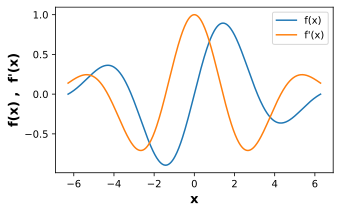

In [6]:
plt.figure(figsize = (5,3) , dpi = 120)
plt.plot(x,fx(x) ,x,dfx(x))
plt.legend(['f(x)' , "f'(x)"])

plt.xlabel("x" ,fontweight = 'bold' ,fontsize = 13)
plt.ylabel("f(x) ,  f'(x)"   ,fontweight = 'bold' ,fontsize = 13)
plt.show()

### 3. Finding Minima using Iteration and Plotting on the Graph

Start Point : [5.36984007]
Final Point :  [4.30581703]


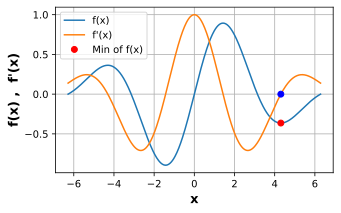

In [7]:
# Random Starting point
localmin = np.random.choice(x,1)
print("Start Point :" , localmin)

# Learning Parameters
learning_rate = 0.05
training_epochs = 500

# Run through Traning
for i in range(training_epochs):
    
    grad = dfx(localmin)
    
    localmin = localmin - grad*learning_rate

print("Final Point : " ,localmin)


# Plot the results
plt.figure(figsize = (5,3) , dpi = 120)
plt.plot(x,fx(x) ,x,dfx(x) )

plt.plot(localmin,fx(localmin) , "ro")
plt.plot(localmin , dfx(localmin) , "bo")

plt.xlabel("x" ,fontweight = 'bold' ,fontsize = 13)
plt.ylabel("f(x) ,  f'(x)"   ,fontweight = 'bold' ,fontsize = 13)

plt.legend(['f(x)' ,"f'(x)","Min of f(x)"])
plt.grid(visible=True)

plt.show()

### 4. Run Parametric Experiment

#### (i) Experiment 1 : Systematically varying the Start Point

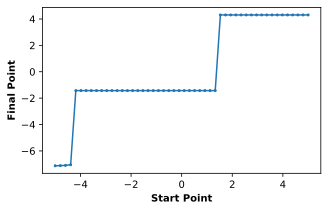

In [8]:
startloc = np.linspace(-5,5,50)
finalloc = np.zeros(len(startloc))

# Learning Parameters
learning_rate = 0.05
training_epochs = 500

# Loop over starting locations
for idx,localmin in enumerate(startloc):
    
    # Run through Training
    for i in range(training_epochs):
        
        grad = dfx(localmin)
    
        localmin = localmin - grad*learning_rate
    
    # Storing the local min after each iteration
    finalloc[idx] = localmin
    

# Plot the graph 
plt.figure(figsize = (5,3) , dpi = 120)
plt.plot(startloc,finalloc,"o-" ,markersize = 2)
plt.xlabel("Start Point",fontweight = 'bold' ,fontsize = 10)
plt.ylabel("Final Point",fontweight = 'bold' ,fontsize = 10)

plt.show()

#### (ii) Experiment 2 : Systematically varying the Learning Rate

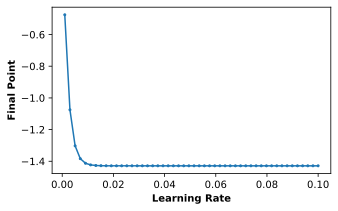

In [9]:
lr = np.linspace(0.001,0.1,50)
finalloc = np.zeros(len(lr))
training_epochs = 500

for idx,LR in enumerate(lr):
    
    
    # Force starting guess 
    localmin = 0
    
    # Run through Training
    for i in range(training_epochs):
        
        
        grad = dfx(localmin)
    
        localmin = localmin - grad*LR
        
    finalloc[idx] = localmin
    
#Plot the graph 
plt.figure(figsize = (5,3) , dpi = 120)
plt.plot(lr,finalloc,"o-" ,markersize = 2)
plt.xlabel("Learning Rate",fontweight = 'bold' ,fontsize = 10)
plt.ylabel("Final Point",fontweight = 'bold' ,fontsize = 10)

plt.show()


#### (iii) Expermient 3 : Interation between Learning rate & Training epochs

In [10]:
lr = np.linspace(0.001,0.1,50)
te = np.int32(np.linspace(50,500,20))

finalloc = np.zeros((len(lr) , len(te)))

for lidx,LR in enumerate(lr):
    
    for Eidx , TE in enumerate(te) : 
    # Force starting guess 
        localmin = 0  

        # Run through Training
        for i in range(TE):

            grad = dfx(localmin)

            localmin = localmin - grad*LR

        finalloc[lidx,Eidx] = localmin

In [11]:
finalloc.max()

-0.049973745159646754

In [12]:
finalloc.min()

-1.428870011214076

#### Plot the results

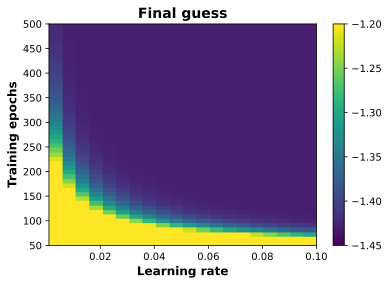

In [18]:
fig,ax = plt.subplots(figsize=(6,4))

plt.imshow(finalloc,extent=[lr[0],lr[-1],te[0],te[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)

plt.xlabel('Learning rate' , fontsize = 12 ,fontweight = "bold")

plt.ylabel('Training epochs',fontsize = 12 ,fontweight = "bold")

plt.title('Final guess',fontsize = 14 ,fontweight = "bold")
plt.colorbar()
plt.show()

#### Another visualization

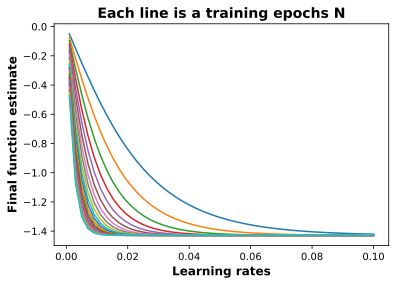

In [22]:
plt.figure(figsize = (6,4) , dpi = 130)
plt.plot(lr,finalloc)
plt.xlabel('Learning rates', fontsize = 12 ,fontweight = "bold")
plt.ylabel('Final function estimate' , fontsize = 12 ,fontweight = "bold")
plt.title('Each line is a training epochs N' ,fontsize = 14 ,fontweight = "bold")
plt.show()